In [1]:
from random import uniform
from sampling.montecarlo import MonteCarlo

In [2]:
def sampling_func():
    x = uniform(0.0, 1.0)   
    y = uniform(0.0, 1.0)

    if (x**2 + y**2 <= 1):
        return True
    else:
        return False

def aggregate_func(samples):

    count_true  = 0
    count_total = len(samples)

    for sample in samples:
        if sample == True:
            count_true += 1

    return (4.0 * count_true / count_total)

In [3]:
num_samples = 20000000
n_jobs = 2

mc = MonteCarlo(sampling_func, aggregate_func)
pi = mc.simulate(num_samples, n_jobs)

print ("pi: {}".format(pi))

pi: 3.1419332


# For plotting

In [16]:
import matplotlib.pyplot as plt

In [17]:
def sampling():
    x = uniform(0.0, 1.0)   
    y = uniform(0.0, 1.0)

    if (x**2 + y**2 <= 1):
        state = True
    else:
        state = False
        
        
    return {"state": state, "point": (x, y)}

def aggregate(samples):
    
    agg_samples = {True: {"x": [], "y": []}, False: {"x": [], "y": []} }
    for sample in samples:
        agg_samples[sample["state"]]["x"].append(sample["point"][0])
        agg_samples[sample["state"]]["y"].append(sample["point"][1])


    return agg_samples

In [30]:
num_samples = 2000
n_jobs = 2

mc = MonteCarlo(sampling, aggregate)
points = mc.simulate(num_samples, n_jobs)

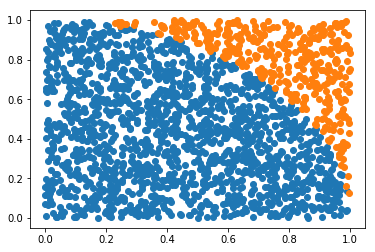

In [31]:
for state in points:
    plt.plot(points[state]["x"], points[state]["y"], "o")